In [2]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopy
import geopy.distance

import networkx as nx
import osmnx as ox
ox.config(log_console=True)

import heapq

import watermark

%load_ext watermark
%matplotlib inline

In [4]:
place = 'Manhattan, NY, USA'
G_roads = ox.graph_from_place(place, network_type='drive')

In [5]:
print("nodes:", G_roads.number_of_nodes())
print("edges:", G_roads.number_of_edges())

nodes: 4589
edges: 9899


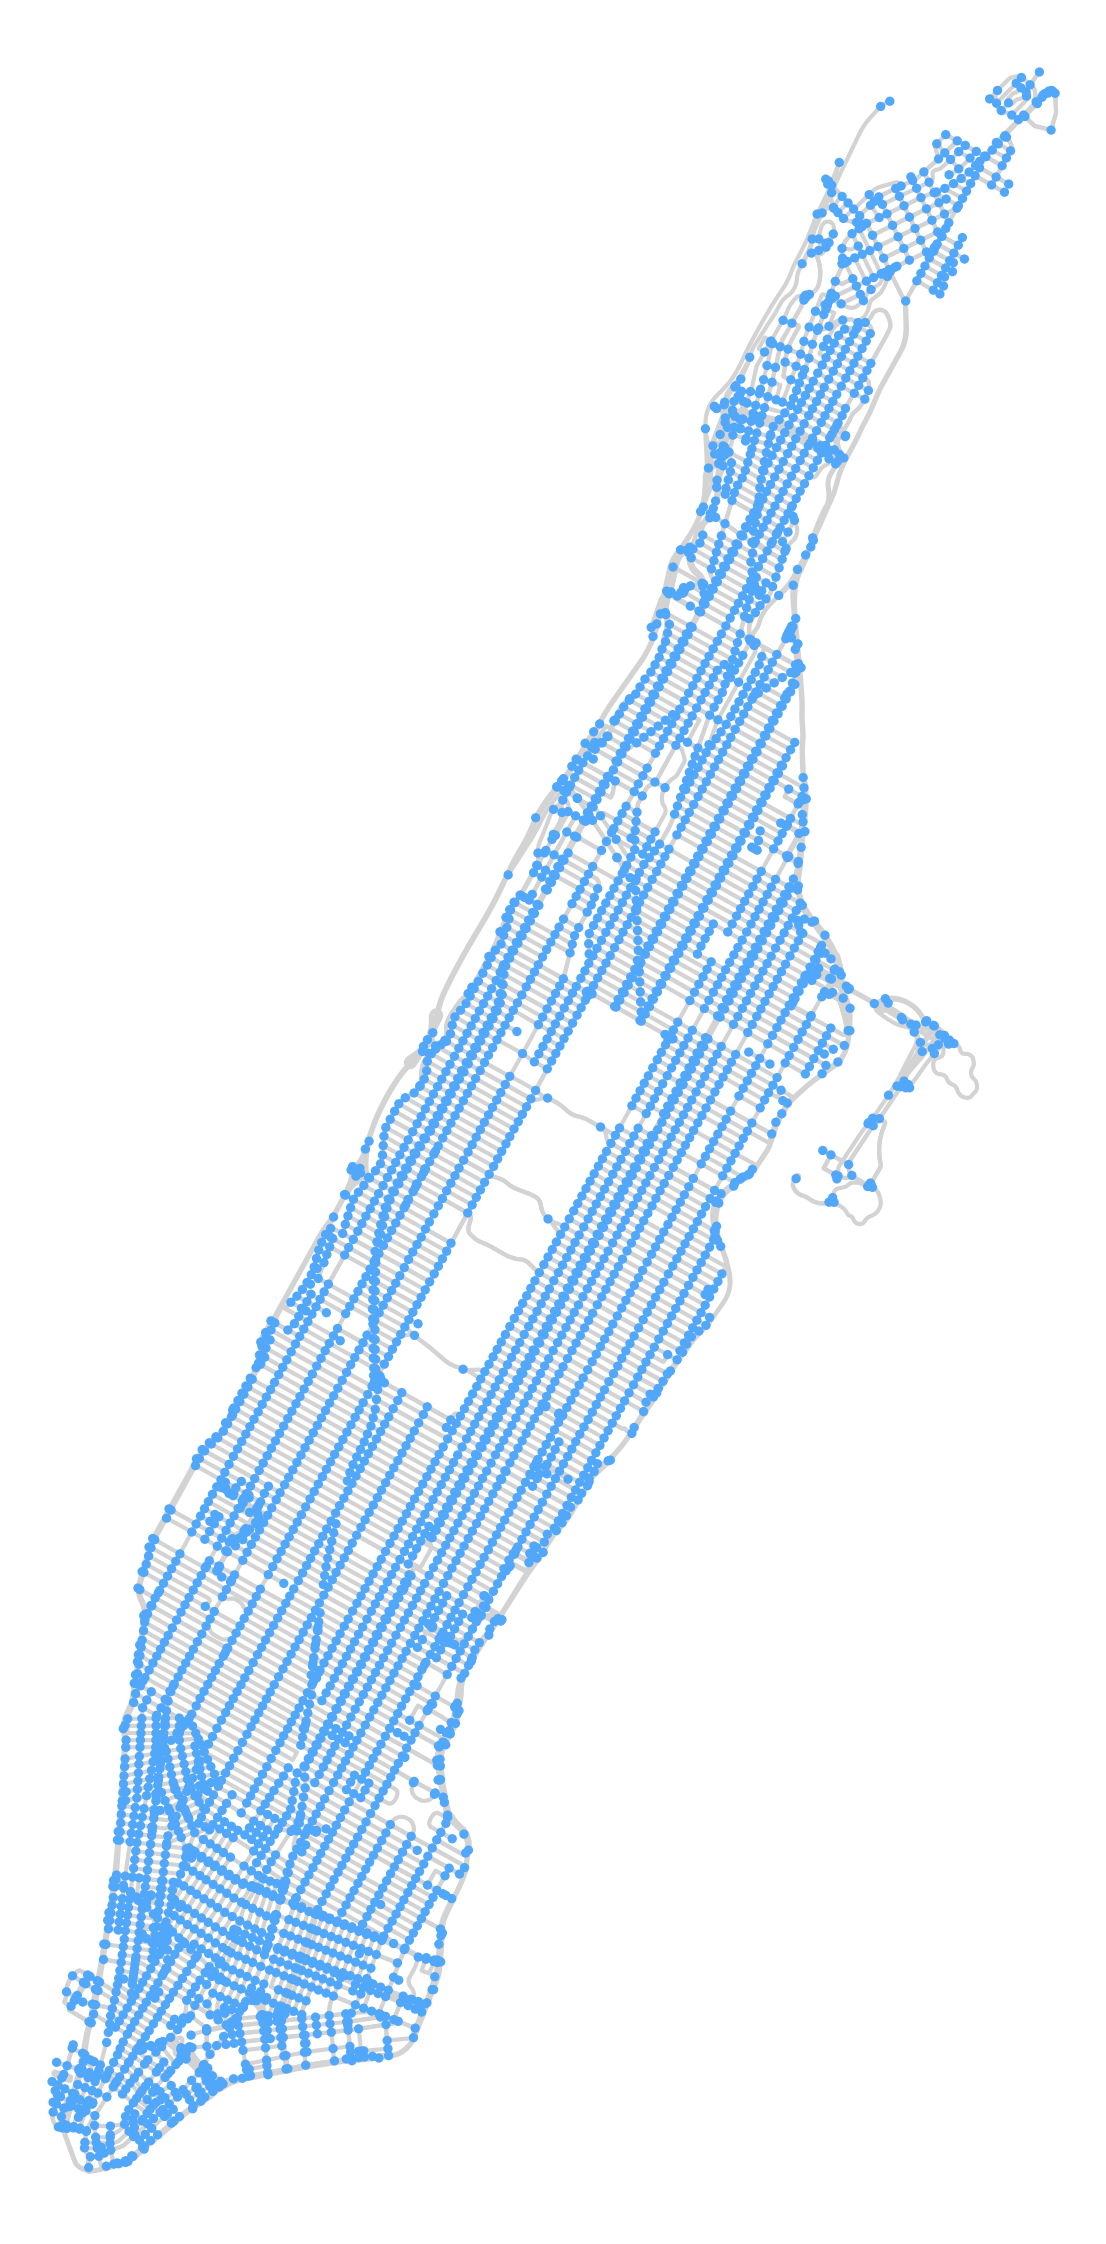

(<Figure size 2400x2400 with 1 Axes>, <AxesSubplot:>)

In [11]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G_roads, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

In [12]:
G_roads.nodes[42421728]

{'y': 40.7980478,
 'x': -73.9600437,
 'highway': 'traffic_signals',
 'street_count': 3}

In [13]:
coords_1 = (G_roads.nodes[42442575]['y'], G_roads.nodes[42442575]['x'])
coords_2 = (G_roads.nodes[42437142]['y'], G_roads.nodes[42437142]['x'])

geopy.distance.distance(coords_1, coords_2).m

86.17934367646964

In [14]:
node_i = ox.get_nearest_node(G_roads, ox.geocoder.geocode('World Trade Center'))
node_j = ox.get_nearest_node(G_roads, ox.geocoder.geocode('Columbia University'))
route = nx.shortest_path(G_roads, node_i, node_j, weight = 'length')

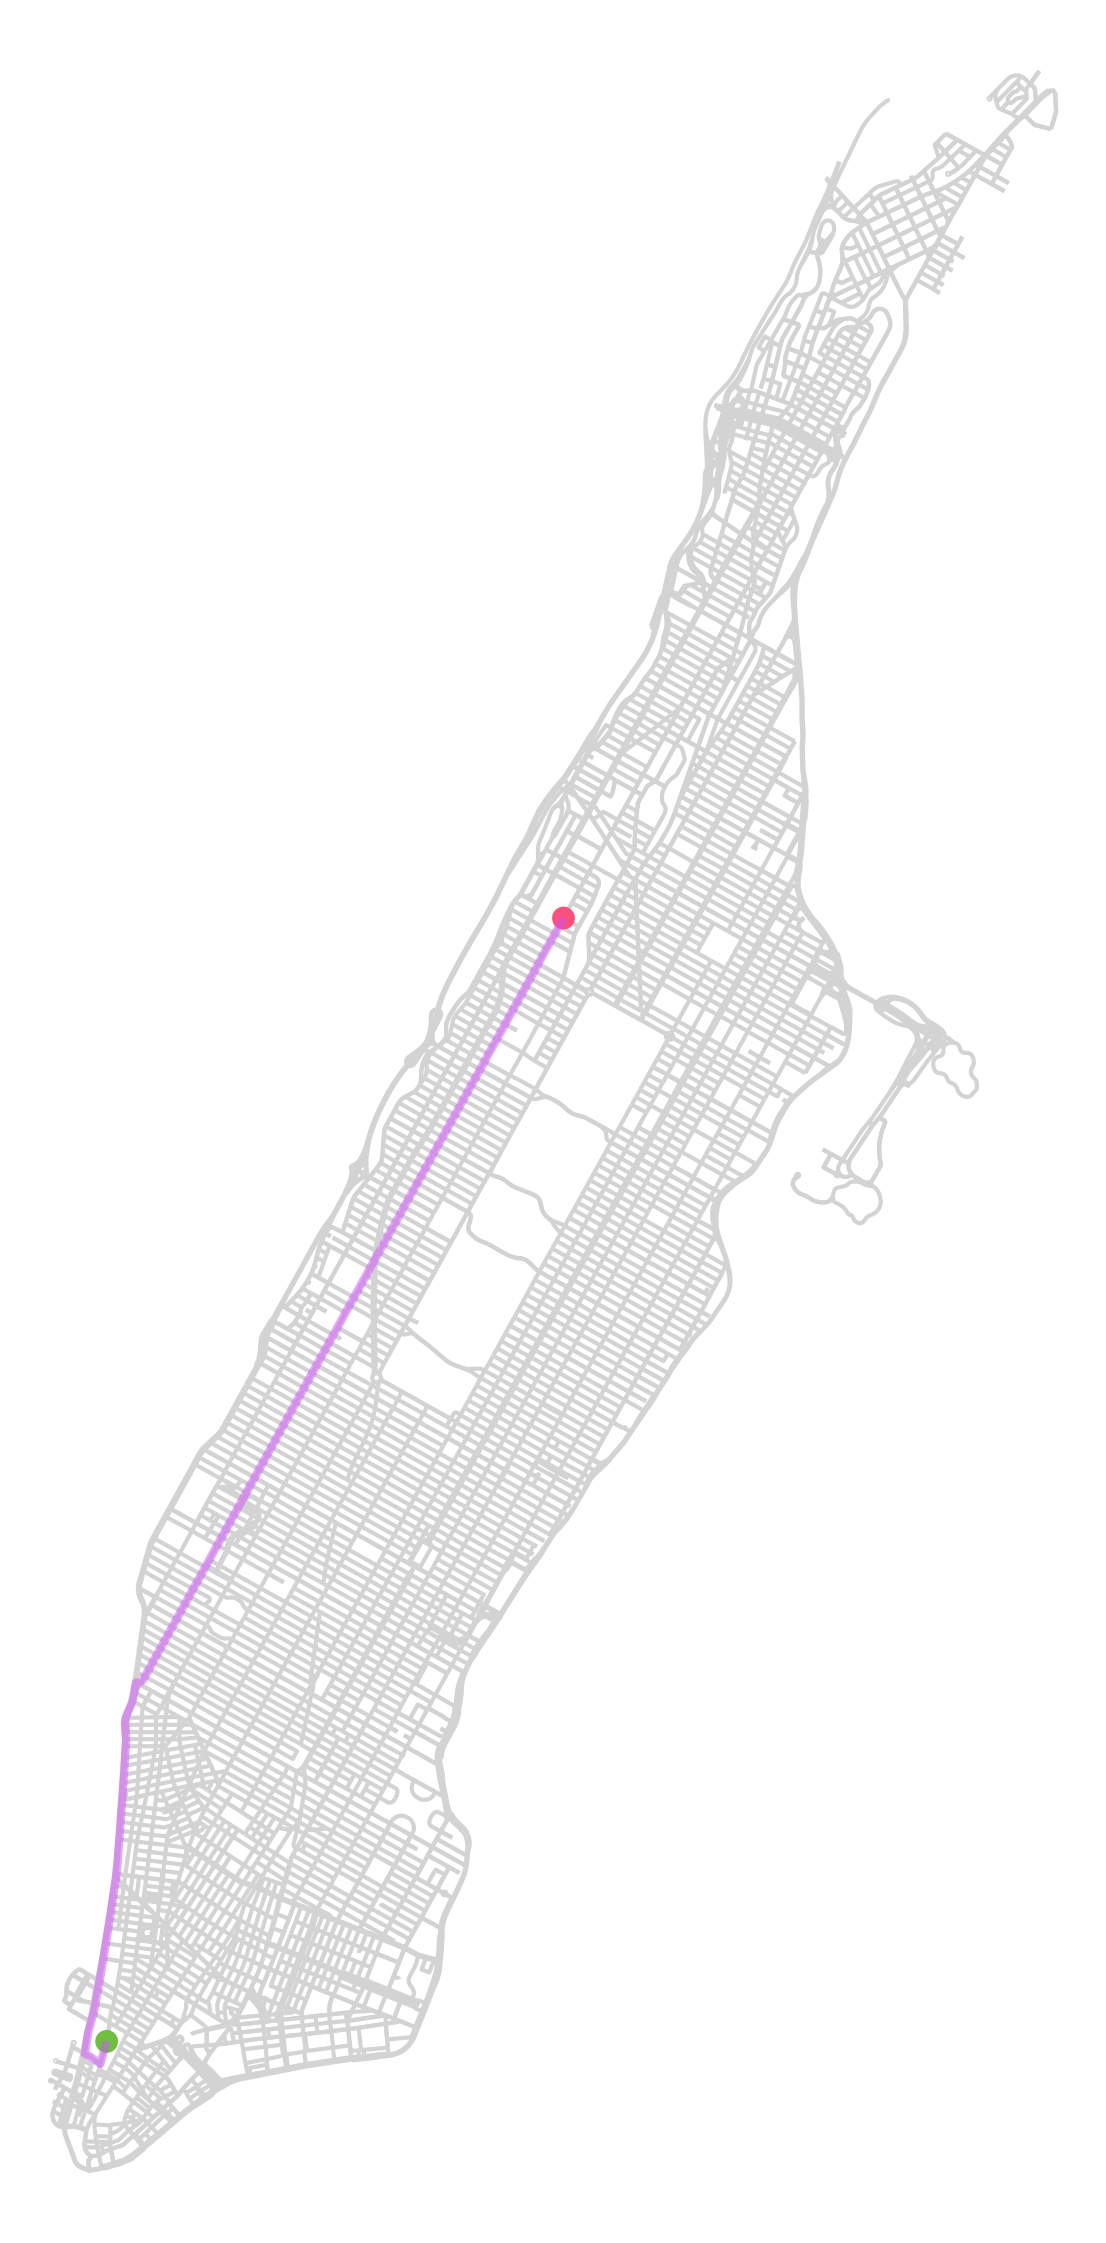

In [15]:
fig, ax = ox.plot.plot_graph_route(G_roads, route, route_alpha=0.5, route_color=colors[1], route_linewidth=2, 
                         node_size=5, bgcolor='#FFFFFF', node_color='none', edge_color='lightgray',
                         orig_dest_size=0, show=False, close=False)

x = (G_roads.nodes[node_i]["x"], G_roads.nodes[node_j]["x"])
y = (G_roads.nodes[node_i]["y"], G_roads.nodes[node_j]["y"])

ax.scatter(x, y, s=30, c=[colors[2], colors[5]], alpha=1, edgecolor="none")

In [17]:
coords_1 = (G_roads.nodes[42442575]['y'], G_roads.nodes[42442575]['x'])
coords_2 = (G_roads.nodes[42437142]['y'], G_roads.nodes[42437142]['x'])
coords_3 = (G_roads.nodes[42422035]['y'], G_roads.nodes[42422035]['x'])
coords_4 = (G_roads.nodes[42453398]['y'], G_roads.nodes[42453398]['x'])
coords_5 = (G_roads.nodes[42429570]['y'], G_roads.nodes[42429570]['x'])
coords_6 = (G_roads.nodes[42449613]['y'], G_roads.nodes[42449613]['x'])

In [18]:
geopy.distance.distance(coords_1, coords_6).m

10867.938581501188

In [19]:
geopy.distance.distance(coords_1, coords_2).m

86.17934367646964

In [20]:
geopy.distance.distance(coords_3, coords_2).m

11587.843915785035

In [21]:
ox.geocoder.geocode('World Trade Center')

(40.7118877, -74.0124412)

In [22]:
node_j = ox.get_nearest_node(G_roads, ox.geocoder.geocode('Empire State Building'))

In [23]:
node_i = ox.get_nearest_node(G_roads, ox.geocoder.geocode('World Trade Center'))

In [27]:
node_k = ox.get_nearest_node(G_roads, ox.geocoder.geocode('Columbia University'))

In [31]:
route = nx.shortest_path(G_roads, node_i, node_j, weight = 'length')
route1 = nx.shortest_path(G_roads, node_j, node_k, weight = 'length')
